# Computer Vision - Assignment 0 - Introduction to OpenCV

#### Bonus: 4 points   |   Due date: September 30, 23:59   |   Submission site: https://pradogrado2223.ugr.es/

### Student's Full Name: Juan Miguel Gomez Daza

The first step is to connect with Google Drive and import the suitable libraries. 

In [2]:
#  We start by getting access to the drive
from google.colab import drive
drive.mount('/content/drive')
import os
# this definition allows to read files in a specific path
get_image = lambda route: os.path.join('/content/drive/MyDrive/images/',route)

Mounted at /content/drive


In [3]:
# We import the modules to use
import cv2
import numpy as np
from matplotlib import pyplot as plt
# With this backend, the output of plotting commands is displayed inline within 
# frontends like the Jupyter notebook, directly below the code cell that produced 
# it. The resulting plots will then also be stored in the notebook document.
# See https://ipython.readthedocs.io/en/stable/interactive/plotting.html
%matplotlib inline

# Exercise 1

Write a function (`readIm`) that reads an image file and displays it either in grayscale or color. `flagColor` is the variable that determines whether the image is displayed in grayscale or color. Depending on the value of `flagColor` we will have a grayscale image (if `0`) or a color image (if `1`). By default, omitting the `flagColor` parameter makes it `flagColor=1` (color). Show that the function works correctly by displaying one grayscale and one color image. 

#### Solution



In [4]:
def readIm(filename, flagColor=1):
  # imread lee la imagen filename, el flag indica como leerla, si es 0 la leera en escala de grises, si es 1 la leera en color
  image = cv2.imread(filename,flagColor)
  
  # hay que convertir la imagen a rgb ya que cv2 lee las imagenes en bgr
  if flagColor == 1:
    image = image[:,:,::-1]

  return image

We display the color version of the `logoOpenCV.jpg` image (three channels: RGB in matplotlib or BGR in OpenCV)

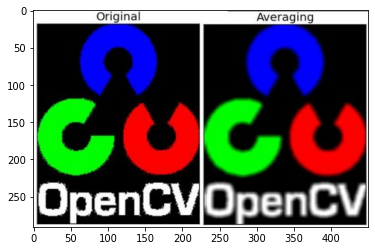

In [5]:
# leemos la imagen con el flag a uno para leerla como imagen a 3 canales
im_color = readIm(get_image('logoOpenCV.jpg'), 1)
# para mostrar la imagen habia usado inicialmente la funcion cv_imshow por que asi me ahorraba el paso de convertir de bgr a rgb, 
# pero esta funcion esta mucho mas limitada
plt.imshow(im_color) 

We display the same image in grayscale (one channel)





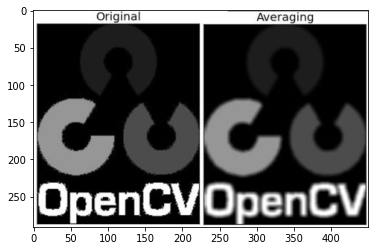

In [6]:
# leemos la imagen como escala de grises con el flag a 0
im_bn = readIm(get_image('logoOpenCV.jpg'), 0)
# mostramos la imagen con la paleta de color que mas nos guste, si queremos escala de grises la paleta es gray
plt.imshow(im_bn, cmap='gray')

---

# Exercise 2

Write a function that displays an array of arbitrary real numbers (that must include positive and negative values). This function should handle images with one and three bands/channels. You have to display visual examples with random images and real images in both scenarios, one-channel (grayscale) and three-channels (RGB). Hint: band values have to be shifted and scaled in the proper range ([0,1]) to avoid information loss.

#### Solution

In [7]:
def rangeDisplay01(im, flag_GLOBAL):
  # La funcion por tanto recibe una matriz, que representa la imagen, y la normaliza dentro del rango 0,1, en el caso de imagenes con 3 canales
  # normaliza cada canal en ese rango, estas imagenes pueden ser normalizadas de dos formas diferentes y se indica con el flagColor
  # flagGlobal = normalizacion por canal o normalizacion global
  # Si se hace por canal esto supone una perdida de informacion por que se pierden las relaciones de los colores entre los canales,
  # y por tanto los colores se pueden ver afectados al mostrar la imagen. En algunos casos los colores no son importantes y esta
  # normalizacion se puede llevar a cabo por canal
  # La respuesta a la tercera pregunta de la practica claramente es que no, solo en el caso de que la imagen tuviera valores 0 como minimo y 
  # 255 como maximo en todos los pixeles se lograria la normalizacion deseada ([0,1])
  
  #check image type (grayscale or color)
  mono = len(im.shape) == 2
  if mono:
    # normalize the grayscale image
    # compute range and apply normalization

    vmin = np.min(im)
    vmax = np.max(im)
    delta = -vmin
    width = vmax - vmin
    im = (im + delta)/width

  # if 3 channel image
  elif len(im.shape) == 3:
    # normalize each band as a grayscale image
    if flag_GLOBAL == 1:
        # normalize as global
        vmin = np.min(im)
        vmax = np.max(im)
        delta = -vmin
        width = vmax - vmin

        im = (im + delta)/width
    elif flag_GLOBAL == 0:
        # normalizando por banda
        rband = im[:,:,0]
        gband = im[:,:,1]
        bband = im[:,:,2]

        #normalizacion de la banda roja
        vmin = np.min(rband)
        vmax = np.max(rband)
        delta = -vmin
        width = vmax - vmin
        im[:,:,0] = (rband + delta)/width

        #normalizacion de la banda verde
        vmin = np.min(gband)
        vmax = np.max(gband)
        delta = -vmin
        width = vmax - vmin
        im[:,:,1] = (gband + delta)/width

        #normalizacion de la banda azul
        vmin = np.min(bband)
        vmax = np.max(bband)
        delta = -vmin
        width = vmax - vmin
        im[:,:,2] = (bband + delta)/width

    else:
      print('Error: flag_GLOBAL no es correcto')


  return im

Let's write a function to display any image  with a title

In [8]:
def displayIm(im, title='Result',factor= 1, showFlag=True):
  # Esta funcion muestra una imagen, independientemente de si tiene 3 o un solo canal.
  # Como opciones la funcion permite incluir un titulo, mostrarla ampliada por un factor, y un flag para mostrarla o no.
  # Normalize range [0,255]

  im_norm = rangeDisplay01(im,1)

  # Display the image
  if len(im.shape) == 3:
    # im has three channels
    plt.imshow(im_norm)
  else:
    # im has a single channel
    plt.imshow(im_norm, cmap='gray')

  figure_size = plt.gcf().get_size_inches()
  plt.gcf().set_size_inches(factor * figure_size)
  plt.title(title) #adding title
  plt.xticks([]), plt.yticks([]) #axis label off
  
  if showFlag: plt.show()

Let's test this function using both RGB and gray level images

In [10]:
# se genera una imagen monocanal y una con 3 canales, ambas de tamano 50x50 y con pixeles aleatorios en el rango -122,123
rand_mono = (np.random.rand(50, 50)-0.5)*255
rand_multi = (np.random.rand(50, 50, 3)-0.5)*255

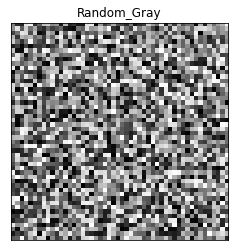

In [11]:
displayIm(rand_mono,'Random_Gray')

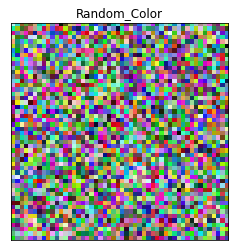

In [12]:
displayIm(rand_multi, 'Random_Color')

Let's try with the real images given above. 

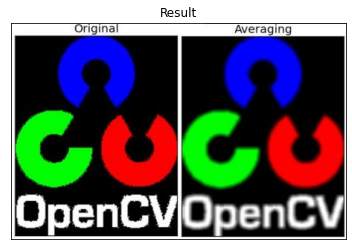

In [13]:
displayIm(im_color)

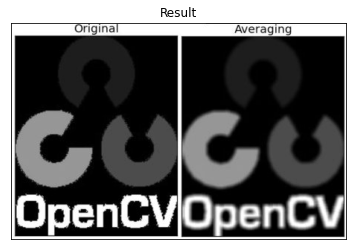

In [14]:
displayIm(im_bn)

---

# Exercise 3

Write a function that takes as input a sequence/list of images (`vim`) and display them simultaneously on the same canvas. Consider the following cases: (a) images with the same size and number of channels, (b) images with different sizes but the same number of channels, and (c) images with different size and number of channels. Show visual examples of the three scenarios. 

#### Solution

Case (a): the student can concatenate the images by rows and columns using the numpy functions vstack() and hstack().

Case (b): Here a good policy could be to insert the largest image in the upper left corner of the canvas and add new images from the left along the bottom and diagonal iteratively.

Case (c): Convert all single-channel images to three-channel images and go to case (b).

Students are allowed to create two functions (`displayMI_ES` and `displayMI_NES`) to separately tackle scenarios (a) and (b)-(c), respectively. 

In [15]:
def displayMI_ES(vim, title='Result', factor=1):
  # Esta funcion muestra varias imagenes en una misma grafica, en este caso se supone que todas las imagenes tienen el mismo tamano y mismo numero de canales.
  # La funcion lo que hace es crear una imagen que esta formada concatenando las imagenes que se pasan en la lista, en este caso he hecho que se muestren solo
  # dos imagenes por fila. Se puede cambiar el numero de imagenes por columna con el valor ncols. En los casos en los que tenemos un numero de imagenes que 
  # no permite mostrarlo en una cuadricula de ncols x nrows, (esto ocurre si el numero de imagenes no es multiplo de ncols) rellenaremos los huecos con una imagen
  # de relleno refill_im que es una imagen con todos los pixeles a 0. Una vez obtenida la nueva imagen llamamos a la funcion displayIm() para mostrarla en panatalla.
  
  # Let's start with case (a). We concatenate the images by columns, or by rows 
  # and columns, depending on the number of images and their dimensions

  nim = len(vim) # numero de imagenes
  ncols = 2 # numero de columnas
  nrows = nim // ncols # numero de filas
  
  refill_im = np.zeros(vim[0].shape) # imagen para usar de relleno

  i = 0 # indice de vim
  rows = []

  for j in range(0,nrows):
    new_row = []
    for k in range(0,ncols):
      new_row.append(vim[i])
      i+=1
    rows.append(np.hstack(new_row)) # generamos una imagen para cada fila, concatenando horizontalmente ncols (4) imagenes de vim

  # si faltan imagenes por incluir
  if (nim % ncols) != 0:
    nrows += 1
    new_row = []
    nir = nim % ncols

    # se crea una fila con las imagenes que falten
    for j in range(i,nim):
      new_row.append(vim[j])

    # se rellena la fila con la imagen de relleno refill_im
    for j in range(nim,ncols*nrows):
      new_row.append(refill_im)

    rows.append(np.hstack(new_row))

  # se concatenan verticalmente todas las imagenes (que son filas)
  out = np.vstack(rows)

  displayIm(out,title,factor)


  return out # devuelve la imagen

Let's display two different configurations

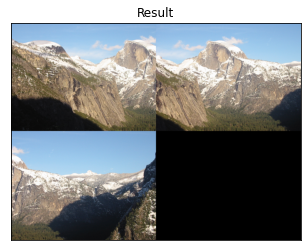

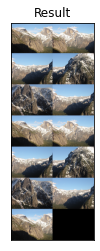

In [16]:
imcolor_1 = readIm(get_image('yosemite1.jpg'))
imcolor_2 = readIm(get_image('yosemite2.jpg'))
imcolor_3 = readIm(get_image('yosemite3.jpg'))
imcolor_4 = readIm(get_image('yosemite4.jpg'))
imcolor_5 = readIm(get_image('yosemite5.jpg'))
vim=[imcolor_1, imcolor_2, imcolor_3]
displayMI_ES(vim)
vim=[imcolor_1, imcolor_2, imcolor_3,imcolor_4, imcolor_5, imcolor_3,imcolor_1, imcolor_2, imcolor_3,imcolor_4, imcolor_5, imcolor_3,imcolor_1]
displayMI_ES(vim)
print('')

Let us now consider the case of images with different sizes but the same number of channels. We can start by placing the first (the largest) in the top-left corner. Then we concatenate by columns and rows the rest of images.

In [17]:
# En vez de implementar la funcion como recomienda el profesor arriba se me ha ocurrido una forma mas sencilla de implementar y que nos evita una serie de problemas
# como por ejemplo definir que es una imagen grande, ya que se puede dar el caso de encontrar una imagen que sea mas ancha que otra pero no mas alta, entonces
# puede resultar realmente dificil de implemtar ese metodo. En vez, reutilizare la funcion creada anteriormente, para ello forzare que todas las imagenes
# tengan el mismo tamano insertandolas dentro de un marco (mayor que cualquiera de las imagenes), y de esta forma se podra llamar a la funcion de arriba utilizando 
# una lista de las imagenes enmarcadas.
def displayMI_NES(vim):
  # definir el tamano del marco
  wmax = 0; # numero de pixeles de ancho del marco
  hmax = 0; # numero de pixeles de alto del marco
  mchan = True # tiene 1 canal
  tchan = True # tiene 3 canales

  # buscamos el mayor ancho y la mayor altura, tambien comprueba si todas las imagenes tienen mismo numero de canales
  for i in vim:
    height = i.shape[0]
    width = i.shape[1]

    if height > hmax:
      hmax = height

    if width > wmax:
      wmax = width

    # print('ishape: ' + str(i.shape))

    if mchan and len(i.shape)!=2: # si no es mono-channel
      mchan = False
    
    if tchan and len(i.shape)!=3: # si no es three-channel
      tchan = False

  vimfr = [] # el vector de imagenes enmarcadas
  #frame = np.zeros((hmax,wmax,3))

  # en el caso de que haya imagenes monochannel y 3-channel, transformamos todas las imagenes a 3-channel
  if not mchan and not tchan:
    tchan == True

    for i in range(len(vim)):
      # si la imagen no es 3 channel
      if len(vim[i].shape)!=3:
        img = vim[i]
        vim[i] = np.zeros((vim[i].shape[0], vim[i].shape[1], 3))
        vim[i][:,:,0] = img
        vim[i][:,:,1] = img
        vim[i][:,:,2] = img

  # enmarcamos las imagenes y las inserto al vector para hacer la llamada displayIM_ES
  for i in vim:
    # creamos el marco
    if mchan:
      new_im = np.zeros((hmax,wmax))
    else:
      new_im = np.zeros((hmax,wmax,3))

    height = i.shape[0]
    width = i.shape[1]

    ipix = (hmax - height) // 2
    jpix = (wmax - width) // 2

    # poner la imagen en el centro del marco
    new_im[ipix:ipix+height,jpix:jpix+width,:] = i
    vimfr.append(new_im)

  out = displayMI_ES(vimfr)

  return out

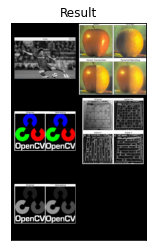

In [18]:
imcolor_1 = readIm(get_image('dave.jpg'))
imcolor_2 = readIm(get_image('logoOpenCV.jpg'))
imcolor_3 = readIm(get_image('orapple.jpg'))
imcolor_4 = readIm(get_image('messi.jpg'))
vim=[imcolor_4,imcolor_3,imcolor_2,imcolor_1, im_bn]
outIm=displayMI_NES(vim)

---

# Exercise 4

Write a function that modifies the color in an image for each of the pixel coordinates included in a list. Specifically, students must insert a green square with a side of 50 pixels in the center of the image. The key idea of this exercise is to understand how to modify the pixel values in an image (a 2D spatial array of pixels, where each pixel is defined by one (illumination in grayscale) or three values (RGB-color)).

#### Solution



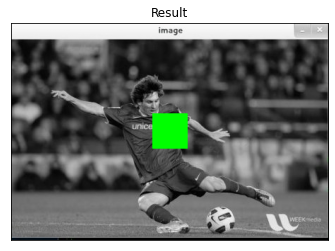

In [23]:
def changePixelValues(im,cp,nv):
  # cp is a vector of pixel coordinates of the top left point
  # nv is a vector with the new values
  # replace the values of cp with the nv values
  # asumimos que el vector cp y nv son correctos antes de llamar a la funcion
  # La funcion recibe una matriz, la imagen, la normalizamos para poder sustituirla luego por un color y este color sea correcto. En este caso nos pide que
  # sea verde entonces sustituimos los pixeles al maximo, 1, en el canal g y a 0 en los canales r y b. En el caso de monocanal el rectangulo se rellena a blanco, 1.
  
  im = rangeDisplay01(im,1)
  x0 = cp[0]
  y0 = cp[1]
  x1 = x0 + nv.shape[0]
  y1 = y0 + nv.shape[1]

  # si es grayscale
  if len(im.shape) == 2:
    im[x0:x1,y0:y1] = nv
  # si es rgb
  else:
    im[x0:x1,y0:y1, 0] = np.zeros((nv.shape[0],nv.shape[1]))
    im[x0:x1,y0:y1, 1] = nv
    im[x0:x1,y0:y1, 2] = np.zeros((nv.shape[0],nv.shape[1]))

  return displayIm(im)

im = readIm(get_image('messi.jpg'))
# create the list of points with the requested shape
nv = np.ones((50,50))
tlpx = (im.shape[0]//2) - 25
tlpy = (im.shape[1]//2) - 25
cp = [tlpx, tlpy] # cordenada punto superior izquierda
changePixelValues(im,cp,nv) 

---

# Exercise 5

Write a function (`print_images_titles`) able to display multiple images, within the same canvas, including specific titles for each one of them. The main novelty of this exercise, with respect to Exercise 3, is the fact of adding a title for each subimage. `print_images_titles` is fed with a list of images and a list of titles. `matplotlib` functions like `add_subplot` or `subplot` can help in this regard.

#### Solution

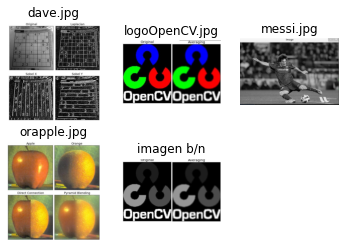

In [24]:
# La funcion muestra imagenes por filas, por defecto usa dos, mostrando el titulo para cada una de ellas.
# Lo unico destacable de esta implementacion es que hace falta comprobar el nuemos de columnas que hacen 
# falta para mostrar la imagen en rows filas. Tambien comprueba si las imagenes son monocanal y en ese caso
# utilizara la paleta de color en blanco y negro
def print_images_titles(vim, titles=None, rows=2):
    nim  = len(vim)
    cols = nim // rows

    if nim % rows > 0:
      cols += 1
    
    for i in range(0,nim):
      plt.subplot(rows, cols, i+1)
      plt.title(titles[i])
      plt.axis('off')

      # si la imagen es monocanal
      if len(vim[i].shape) == 2:
        plt.imshow(vim[i], cmap='gray')
      else:
        plt.imshow(vim[i])


im1 = readIm(get_image('dave.jpg'))
im2 = readIm(get_image('logoOpenCV.jpg'))
im3 = readIm(get_image('messi.jpg'))
im4 = readIm(get_image('orapple.jpg'))
im5 = im_bn
vim = [im1, im2, im3, im4, im5] 
titles = ['dave.jpg','logoOpenCV.jpg','messi.jpg','orapple.jpg', 'imagen b/n']

print_images_titles(vim, titles)